# Neural Net without MicroCG Measurements

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Normalization
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from gekko.ML import CustomMinMaxGekkoScaler


df = pd.read_csv('Training Set.csv').dropna()
df2 = pd.read_csv('Test Set.csv').dropna()
df3 = pd.read_csv('Aug4_6 Data.csv').dropna()

## Visualize

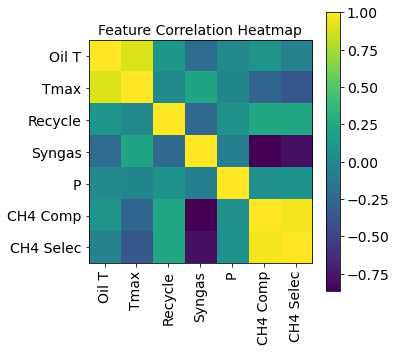

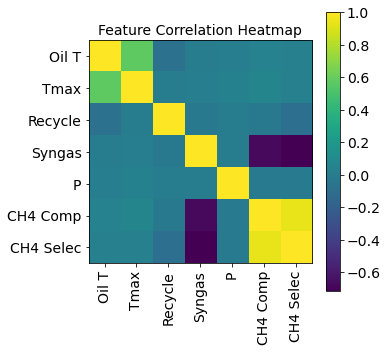

,Oil T,Tmax,Recycle,Syngas,P,CH4 Comp,CH4 Selec
0,207.5522,211.4296,40.0040,2.9987,20.0223,6.1407,0.1197
1,207.4693,211.4228,39.9893,2.9987,20.0548,6.1407,0.1197
2,207.4876,211.3962,40.0047,2.9996,20.0395,6.1216,0.1195
3,207.5664,211.4757,39.9727,2.9991,20.0456,6.1216,0.1195
4,207.4849,211.3824,40.0183,2.9991,20.0469,6.1559,0.1197


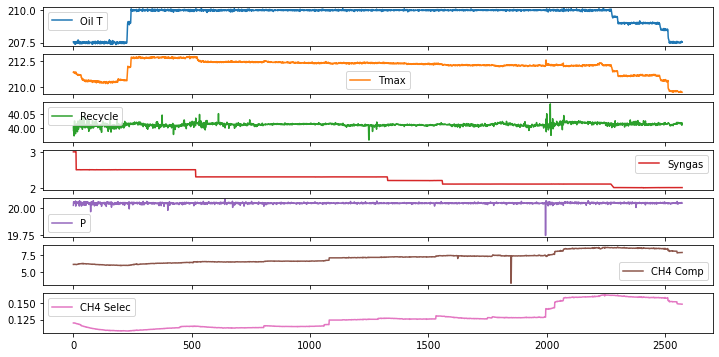

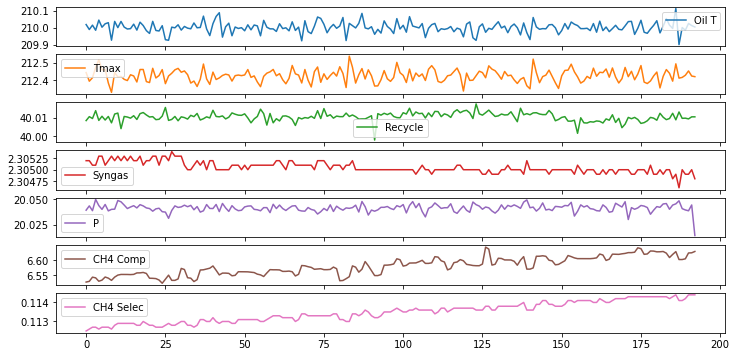

In [247]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


plt.rcParams['figure.figsize'] = [8, 5]
show_heatmap(df)
show_heatmap(df2)

df.plot(figsize=(12,6),subplots='True')
df2.plot(figsize=(12,6),subplots='True')
pd.DataFrame.head(df)

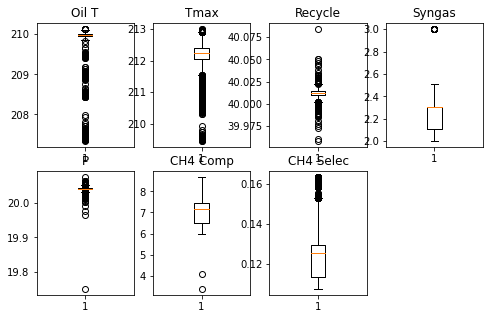

In [248]:
for i,c in enumerate(df.columns):
    if i<=6:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(df[c])
plt.show()

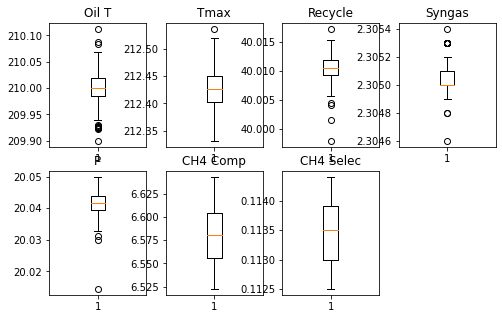

In [249]:
for i,c in enumerate(df2.columns):
    if i<=6:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(df2[c])
plt.show()

## Cleanse

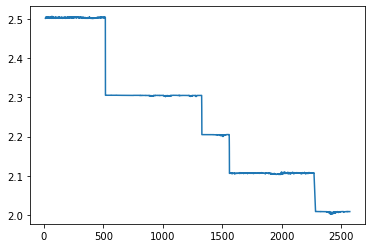

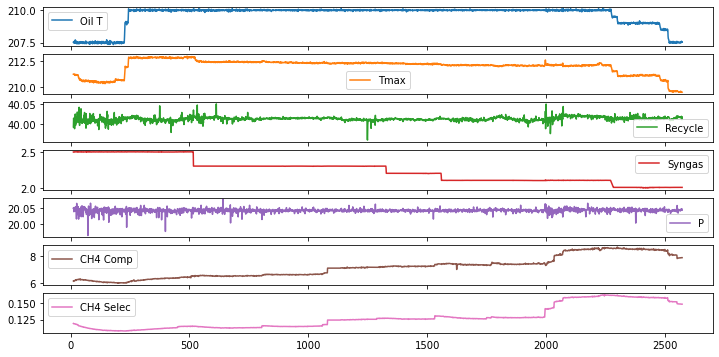

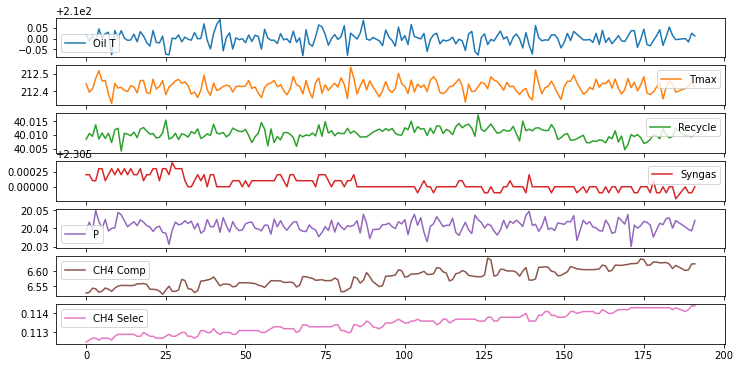

In [2]:
df = df[df['P']>19.8]
df = df[df['CH4 Comp']>5]
df = df[df['Syngas']<2.8]
df = df[df['Recycle']<40.075]
df.head()
df['Syngas'].plot()
df.plot(figsize=(12,6),subplots='True')

df2 = df2[df2['P']>20.02]
df2 = df2[df2['Oil T']<210.1]
df2 = df2[df2['Oil T']>209.91]
df2 = df2[df2['Recycle']>40.003]

df2.plot(figsize=(12,6),subplots='True')

df3 = df3[df3['P']>15.82]
df3 = df3[df3['CH4 Comp']>3]
df3 = df3[df3['Recycle']>23.95]

## Explore Best Features

       Oil T      Tmax  Recycle  Syngas        P  CH4 Comp
12  207.5276  211.2401  39.9918  2.5016  20.0490    6.1347
13  207.5706  211.2336  40.0140  2.5030  20.0511    6.1128
14  207.4759  211.2472  40.0058  2.5038  20.0384    6.1128
15  207.5789  211.2094  40.0003  2.5019  20.0444    6.1445
16  207.4640  211.2358  40.0142  2.5044  20.0426    6.1445


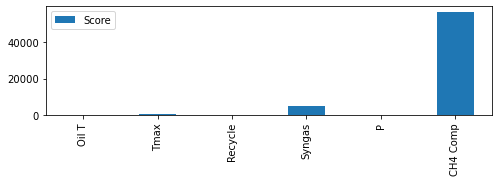

In [251]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

plt.rcParams['axes.facecolor'] = 'white'
bestfeatures = SelectKBest(score_func=f_regression, k='all')
features = ['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P', 'CH4 Comp']
X = df[features]
print(X.head())
y = df['CH4 Selec'] #Labels
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features
scores.plot(kind='bar',figsize=(8,2))
plt.show()

       Oil T      Tmax  Recycle  Syngas        P
12  207.5276  211.2401  39.9918  2.5016  20.0490
13  207.5706  211.2336  40.0140  2.5030  20.0511
14  207.4759  211.2472  40.0058  2.5038  20.0384
15  207.5789  211.2094  40.0003  2.5019  20.0444
16  207.4640  211.2358  40.0142  2.5044  20.0426


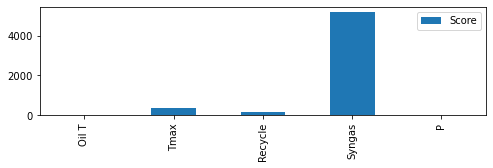

In [252]:
plt.rcParams['axes.facecolor'] = 'white'
bestfeatures = SelectKBest(score_func=f_regression, k='all')
features2 = ['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P']
X = df[features2]
print(X.head())
y = df['CH4 Selec'] #Labels
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features2
scores.plot(kind='bar',figsize=(8,2))
plt.show()

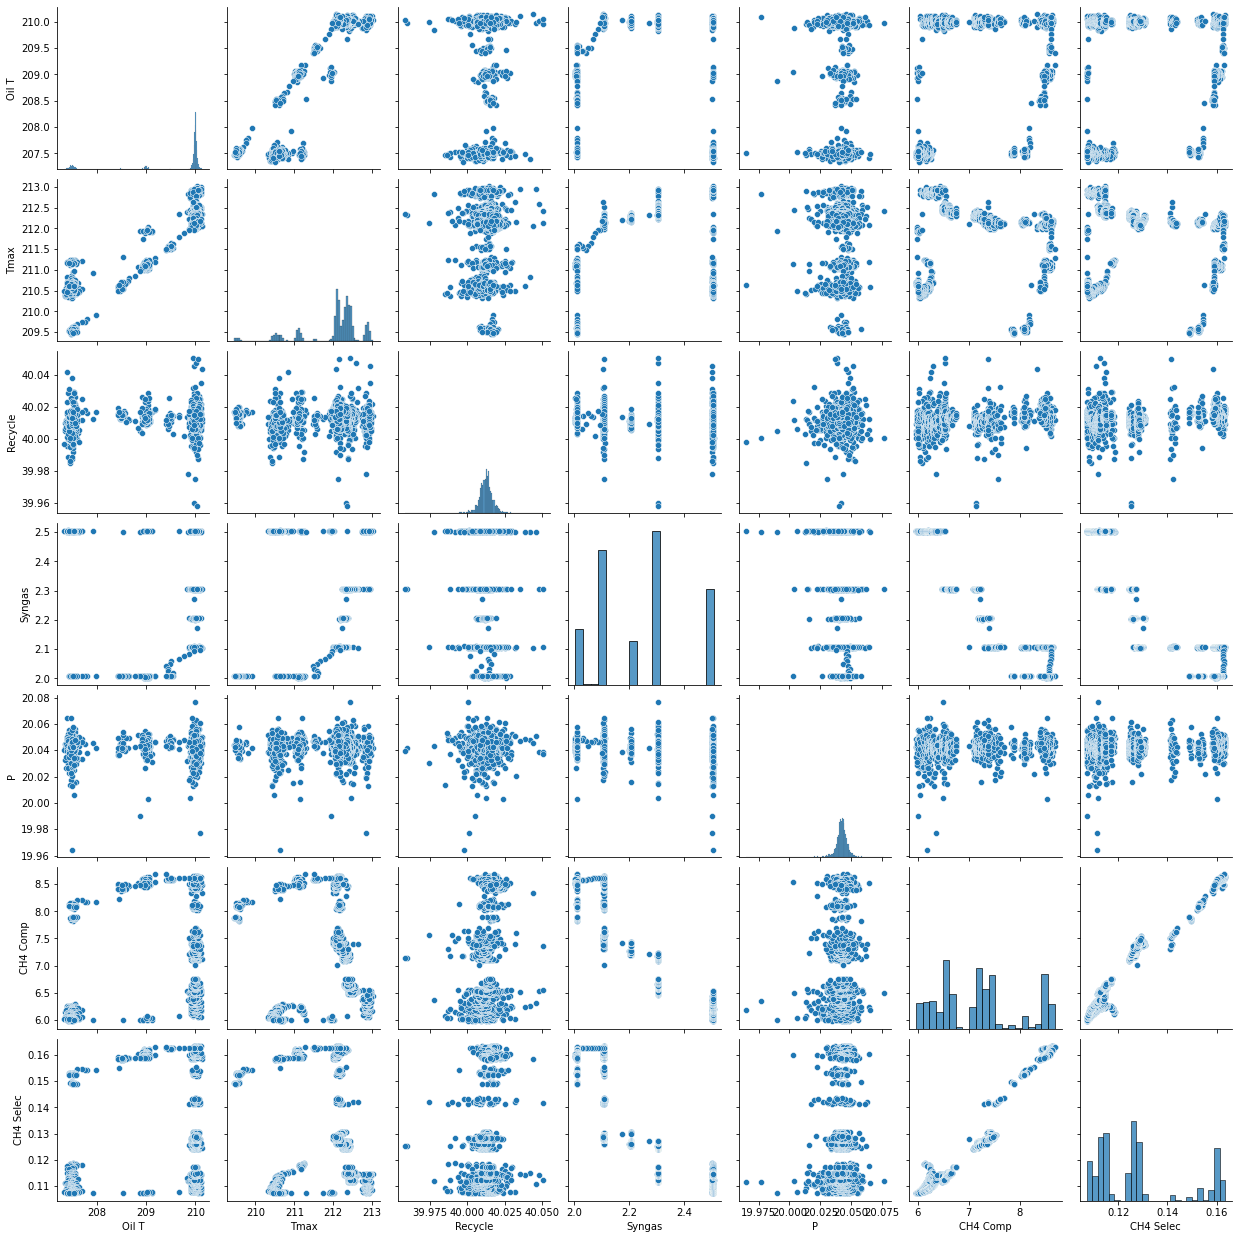

In [253]:
sns.pairplot(df)

## Scale Data

# Normalizes the training data to have a variance of 1 and a mean of 0 for each column in the dataframe

In [189]:
df.head()

,Oil T,Tmax,Recycle,Syngas,P,CH4 Comp,CH4 Selec
12,207.5276,211.2401,39.9918,2.5016,20.0490,6.1347,0.1189
13,207.5706,211.2336,40.0140,2.5030,20.0511,6.1128,0.1185
14,207.4759,211.2472,40.0058,2.5038,20.0384,6.1128,0.1185
15,207.5789,211.2094,40.0003,2.5019,20.0444,6.1445,0.1185
16,207.4640,211.2358,40.0142,2.5044,20.0426,6.1445,0.1185


In [3]:
df3 = df3[['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P', 'CH4 Comp', 'CH4 Selec']]

In [4]:
df4 = df.append(df3)
df4.head()

,Oil T,Tmax,Recycle,Syngas,P,CH4 Comp,CH4 Selec
12,207.5276,211.2401,39.9918,2.5016,20.0490,6.1347,0.1189
13,207.5706,211.2336,40.0140,2.5030,20.0511,6.1128,0.1185
14,207.4759,211.2472,40.0058,2.5038,20.0384,6.1128,0.1185
15,207.5789,211.2094,40.0003,2.5019,20.0444,6.1445,0.1185
16,207.4640,211.2358,40.0142,2.5044,20.0426,6.1445,0.1185


       Oil T      Tmax  Recycle  Syngas        P
12  207.5276  211.2401  39.9918  2.5016  20.0490
13  207.5706  211.2336  40.0140  2.5030  20.0511
14  207.4759  211.2472  40.0058  2.5038  20.0384
15  207.5789  211.2094  40.0003  2.5019  20.0444
16  207.4640  211.2358  40.0142  2.5044  20.0426


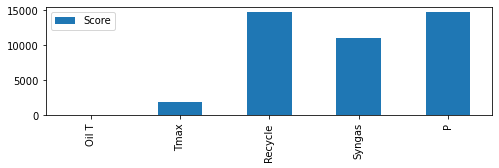

In [268]:
plt.rcParams['axes.facecolor'] = 'white'
bestfeatures = SelectKBest(score_func=f_regression, k='all')
features2 = ['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P']
X = df4[features2]
print(X.head())
y = df4['CH4 Selec'] #Labels
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['Specs','Score']
scores.index = features2
scores.plot(kind='bar',figsize=(8,2))
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

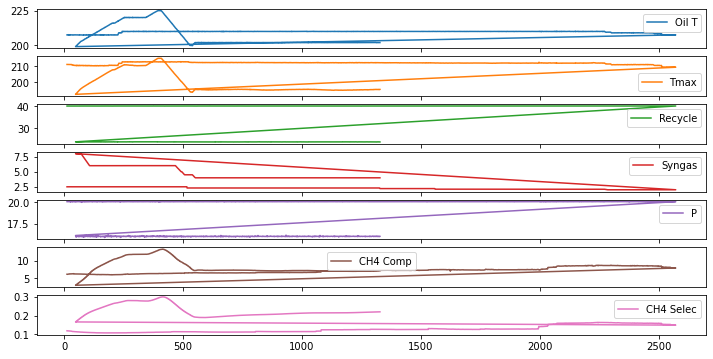

In [269]:
df4.plot(figsize=(12,6),subplots='True')

In [5]:
df4 = df4[['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P', 'CH4 Selec']]

In [7]:
features2 = ['Oil T', 'Tmax', 'Recycle', 'Syngas', 'P']
s = CustomMinMaxGekkoScaler(df4,features2,['CH4 Selec'])

/opt/anaconda3/lib/python3.8/site-packages/gekko/ML.py:981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.newdataScaled[features[i]][j] = (self.newdataScaled[features[i]][j] -
/opt/anaconda3/lib/python3.8/site-packages/gekko/ML.py:989: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.newdataScaled[label[i]][j] = (self.newdataScaled[label[i]][j] -


In [272]:
test.scaledData()

,index,Oil T,Tmax,Recycle,Syngas,P,CH4 Selec
0,12,0.324055,0.826665,0.996340,0.082898,0.993343,0.060864
1,13,0.325710,0.826381,0.997720,0.083131,0.993850,0.058783
2,14,0.322064,0.826976,0.997210,0.083264,0.990787,0.058783
3,15,0.326030,0.825322,0.996868,0.082948,0.992234,0.058783
4,16,0.321606,0.826477,0.997732,0.083364,0.991800,0.058783
...,...,...,...,...,...,...,...
3821,1324,0.110849,0.130643,0.004511,0.331577,0.027205,0.584192
3822,1325,0.113386,0.135146,0.004822,0.331544,0.027519,0.583998
3823,1326,0.110518,0.133247,0.004424,0.331527,0.033717,0.584275
3824,1327,0.111088,0.132831,0.004424,0.331544,0.030292,0.584744


In [8]:
# s = MinMaxScaler()
# s_train = s.fit_transform(df4)

# data = pd.DataFrame(s_train, columns=df4.columns.values)
# training_data = data[features2].to_numpy()
# labels = data['CH4 Selec'].to_numpy()
# print('---Training Data---')
# print("var: %.4f" % np.var(training_data))
# print("mean: %.4f" % np.mean(training_data))

training_data = s.scaledData()[features2]
labels = s.scaledData()['CH4 Selec']

In [230]:
s.data_min_

array([1.991106e+02, 1.923470e+02, 2.395750e+01, 2.002800e+00,
       1.593030e+01, 3.019000e+00, 1.072000e-01])

In [16]:
from joblib import dump

In [17]:
dump(s, 'std_scaler.bin', compress=True)

['std_scaler.bin']

# Defines a function that will plot the loss of the training and validation data sets as model is being trained

In [9]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Creating the model

In [10]:
model = Sequential([
    Dense(units=training_data.shape[-1], input_shape=(training_data.shape[-1],), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 3

# Compiles and trains the model to use the Adam optimizer and mean squared error loss function

In [11]:
x_train, x_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.15, shuffle=True, random_state=42)
print(len(x_train),len(x_test))

3252 574


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
history = model.fit(x=x_train, y=y_train, epochs=700, verbose=2, validation_data=(x_test, y_test))

Epoch 1/700
102/102 - 1s - loss: 0.1157 - mae: 0.2466 - val_loss: 0.0855 - val_mae: 0.2170 - 964ms/epoch - 9ms/step
Epoch 2/700
102/102 - 0s - loss: 0.0682 - mae: 0.1990 - val_loss: 0.0368 - val_mae: 0.1503 - 180ms/epoch - 2ms/step
Epoch 3/700
102/102 - 0s - loss: 0.0196 - mae: 0.1071 - val_loss: 0.0102 - val_mae: 0.0768 - 193ms/epoch - 2ms/step
Epoch 4/700
102/102 - 0s - loss: 0.0095 - mae: 0.0734 - val_loss: 0.0082 - val_mae: 0.0687 - 182ms/epoch - 2ms/step
Epoch 5/700
102/102 - 0s - loss: 0.0080 - mae: 0.0683 - val_loss: 0.0073 - val_mae: 0.0654 - 187ms/epoch - 2ms/step
Epoch 6/700
102/102 - 0s - loss: 0.0072 - mae: 0.0655 - val_loss: 0.0067 - val_mae: 0.0611 - 188ms/epoch - 2ms/step
Epoch 7/700
102/102 - 0s - loss: 0.0065 - mae: 0.0621 - val_loss: 0.0063 - val_mae: 0.0603 - 186ms/epoch - 2ms/step
Epoch 8/700
102/102 - 0s - loss: 0.0060 - mae: 0.0603 - val_loss: 0.0058 - val_mae: 0.0561 - 171ms/epoch - 2ms/step
Epoch 9/700
102/102 - 0s - loss: 0.0055 - mae: 0.0575 - val_loss: 0.0055

102/102 - 0s - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0023 - val_mae: 0.0339 - 169ms/epoch - 2ms/step
Epoch 72/700
102/102 - 0s - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0020 - val_mae: 0.0335 - 163ms/epoch - 2ms/step
Epoch 73/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0330 - 163ms/epoch - 2ms/step
Epoch 74/700
102/102 - 0s - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0020 - val_mae: 0.0340 - 163ms/epoch - 2ms/step
Epoch 75/700
102/102 - 0s - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0021 - val_mae: 0.0331 - 165ms/epoch - 2ms/step
Epoch 76/700
102/102 - 0s - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0020 - val_mae: 0.0324 - 162ms/epoch - 2ms/step
Epoch 77/700
102/102 - 0s - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0020 - val_mae: 0.0326 - 163ms/epoch - 2ms/step
Epoch 78/700
102/102 - 0s - loss: 0.0020 - mae: 0.0333 - val_loss: 0.0020 - val_mae: 0.0339 - 162ms/epoch - 2ms/step
Epoch 79/700
102/102 - 0s - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0020 - v

Epoch 141/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0325 - 167ms/epoch - 2ms/step
Epoch 142/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0020 - val_mae: 0.0319 - 163ms/epoch - 2ms/step
Epoch 143/700
102/102 - 0s - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0020 - val_mae: 0.0336 - 166ms/epoch - 2ms/step
Epoch 144/700
102/102 - 0s - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0019 - val_mae: 0.0330 - 164ms/epoch - 2ms/step
Epoch 145/700
102/102 - 0s - loss: 0.0020 - mae: 0.0330 - val_loss: 0.0020 - val_mae: 0.0335 - 164ms/epoch - 2ms/step
Epoch 146/700
102/102 - 0s - loss: 0.0019 - mae: 0.0329 - val_loss: 0.0020 - val_mae: 0.0320 - 165ms/epoch - 2ms/step
Epoch 147/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0023 - val_mae: 0.0386 - 165ms/epoch - 2ms/step
Epoch 148/700
102/102 - 0s - loss: 0.0020 - mae: 0.0333 - val_loss: 0.0020 - val_mae: 0.0339 - 164ms/epoch - 2ms/step
Epoch 149/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 

Epoch 211/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0020 - val_mae: 0.0316 - 172ms/epoch - 2ms/step
Epoch 212/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0020 - val_mae: 0.0315 - 175ms/epoch - 2ms/step
Epoch 213/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0334 - 174ms/epoch - 2ms/step
Epoch 214/700
102/102 - 0s - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0020 - val_mae: 0.0351 - 175ms/epoch - 2ms/step
Epoch 215/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0021 - val_mae: 0.0358 - 172ms/epoch - 2ms/step
Epoch 216/700
102/102 - 0s - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0020 - val_mae: 0.0332 - 167ms/epoch - 2ms/step
Epoch 217/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0020 - val_mae: 0.0318 - 162ms/epoch - 2ms/step
Epoch 218/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0342 - 165ms/epoch - 2ms/step
Epoch 219/700
102/102 - 0s - loss: 0.0020 - mae: 0.0332 

Epoch 281/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0020 - val_mae: 0.0349 - 163ms/epoch - 2ms/step
Epoch 282/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0020 - val_mae: 0.0335 - 166ms/epoch - 2ms/step
Epoch 283/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0019 - val_mae: 0.0322 - 177ms/epoch - 2ms/step
Epoch 284/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0020 - val_mae: 0.0317 - 163ms/epoch - 2ms/step
Epoch 285/700
102/102 - 0s - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0020 - val_mae: 0.0341 - 162ms/epoch - 2ms/step
Epoch 286/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0020 - val_mae: 0.0352 - 161ms/epoch - 2ms/step
Epoch 287/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0019 - val_mae: 0.0327 - 162ms/epoch - 2ms/step
Epoch 288/700
102/102 - 0s - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0020 - val_mae: 0.0319 - 163ms/epoch - 2ms/step
Epoch 289/700
102/102 - 0s - loss: 0.0019 - mae: 0.0328 

Epoch 351/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0023 - val_mae: 0.0387 - 168ms/epoch - 2ms/step
Epoch 352/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0019 - val_mae: 0.0334 - 164ms/epoch - 2ms/step
Epoch 353/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0020 - val_mae: 0.0356 - 162ms/epoch - 2ms/step
Epoch 354/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0019 - val_mae: 0.0323 - 166ms/epoch - 2ms/step
Epoch 355/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0316 - 164ms/epoch - 2ms/step
Epoch 356/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0019 - val_mae: 0.0328 - 169ms/epoch - 2ms/step
Epoch 357/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0020 - val_mae: 0.0355 - 178ms/epoch - 2ms/step
Epoch 358/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0357 - 197ms/epoch - 2ms/step
Epoch 359/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 

Epoch 421/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0313 - 170ms/epoch - 2ms/step
Epoch 422/700
102/102 - 0s - loss: 0.0019 - mae: 0.0320 - val_loss: 0.0021 - val_mae: 0.0368 - 179ms/epoch - 2ms/step
Epoch 423/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0020 - val_mae: 0.0315 - 169ms/epoch - 2ms/step
Epoch 424/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0021 - val_mae: 0.0323 - 170ms/epoch - 2ms/step
Epoch 425/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0019 - val_mae: 0.0335 - 166ms/epoch - 2ms/step
Epoch 426/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0019 - val_mae: 0.0334 - 166ms/epoch - 2ms/step
Epoch 427/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0019 - val_mae: 0.0331 - 162ms/epoch - 2ms/step
Epoch 428/700
102/102 - 0s - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0019 - val_mae: 0.0311 - 161ms/epoch - 2ms/step
Epoch 429/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 

Epoch 491/700
102/102 - 0s - loss: 0.0019 - mae: 0.0321 - val_loss: 0.0019 - val_mae: 0.0320 - 163ms/epoch - 2ms/step
Epoch 492/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0019 - val_mae: 0.0318 - 167ms/epoch - 2ms/step
Epoch 493/700
102/102 - 0s - loss: 0.0019 - mae: 0.0320 - val_loss: 0.0019 - val_mae: 0.0314 - 163ms/epoch - 2ms/step
Epoch 494/700
102/102 - 0s - loss: 0.0018 - mae: 0.0319 - val_loss: 0.0020 - val_mae: 0.0316 - 162ms/epoch - 2ms/step
Epoch 495/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0333 - 164ms/epoch - 2ms/step
Epoch 496/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0021 - val_mae: 0.0364 - 163ms/epoch - 2ms/step
Epoch 497/700
102/102 - 0s - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0321 - 162ms/epoch - 2ms/step
Epoch 498/700
102/102 - 0s - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0019 - val_mae: 0.0320 - 164ms/epoch - 2ms/step
Epoch 499/700
102/102 - 0s - loss: 0.0018 - mae: 0.0320 

Epoch 561/700
102/102 - 0s - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0324 - 165ms/epoch - 2ms/step
Epoch 562/700
102/102 - 0s - loss: 0.0019 - mae: 0.0320 - val_loss: 0.0020 - val_mae: 0.0329 - 161ms/epoch - 2ms/step
Epoch 563/700
102/102 - 0s - loss: 0.0018 - mae: 0.0318 - val_loss: 0.0019 - val_mae: 0.0324 - 165ms/epoch - 2ms/step
Epoch 564/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0020 - val_mae: 0.0328 - 162ms/epoch - 2ms/step
Epoch 565/700
102/102 - 0s - loss: 0.0019 - mae: 0.0326 - val_loss: 0.0020 - val_mae: 0.0313 - 162ms/epoch - 2ms/step
Epoch 566/700
102/102 - 0s - loss: 0.0019 - mae: 0.0321 - val_loss: 0.0019 - val_mae: 0.0325 - 163ms/epoch - 2ms/step
Epoch 567/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0323 - 163ms/epoch - 2ms/step
Epoch 568/700
102/102 - 0s - loss: 0.0018 - mae: 0.0320 - val_loss: 0.0020 - val_mae: 0.0330 - 164ms/epoch - 2ms/step
Epoch 569/700
102/102 - 0s - loss: 0.0018 - mae: 0.0319 

Epoch 631/700
102/102 - 0s - loss: 0.0018 - mae: 0.0316 - val_loss: 0.0019 - val_mae: 0.0314 - 165ms/epoch - 2ms/step
Epoch 632/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0019 - val_mae: 0.0312 - 162ms/epoch - 2ms/step
Epoch 633/700
102/102 - 0s - loss: 0.0018 - mae: 0.0320 - val_loss: 0.0019 - val_mae: 0.0325 - 161ms/epoch - 2ms/step
Epoch 634/700
102/102 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0019 - val_mae: 0.0328 - 165ms/epoch - 2ms/step
Epoch 635/700
102/102 - 0s - loss: 0.0018 - mae: 0.0320 - val_loss: 0.0019 - val_mae: 0.0312 - 172ms/epoch - 2ms/step
Epoch 636/700
102/102 - 0s - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0019 - val_mae: 0.0325 - 162ms/epoch - 2ms/step
Epoch 637/700
102/102 - 0s - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0019 - val_mae: 0.0312 - 164ms/epoch - 2ms/step
Epoch 638/700
102/102 - 0s - loss: 0.0018 - mae: 0.0319 - val_loss: 0.0019 - val_mae: 0.0336 - 171ms/epoch - 2ms/step
Epoch 639/700
102/102 - 0s - loss: 0.0018 - mae: 0.0322 

# Plot of training and validation loss

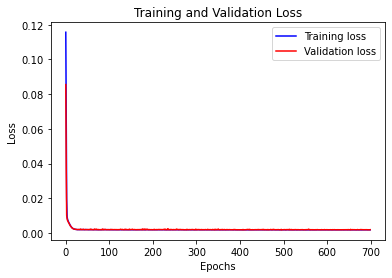

In [13]:
visualize_loss(history, "Training and Validation Loss")

In [19]:
cd

/Users/dallinlittlewood


In [14]:
model.save('/Users/dallinlittlewood/Smart Systems')

INFO:tensorflow:Assets written to: /Users/dallinlittlewood/Smart Systems/assets
